<a href="https://colab.research.google.com/github/lucib3196/Machine_Learning_Projects/blob/main/Predicting_Molecular_Solubility_for_Drug_Viability_A_Machine_Learning_Approach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Molecular Solubility for Drug Viability
In the pursuit for developing effective medications, determining the solubity of molecules is an essential task for biologist and chemist.

In this notebook we will tackle the task of predicting predicting molecular solubility using machine learning techniques.

Machine Learning Models used
- Linear Regression
- Random Forrest

## Load Dataset

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
import pandas as pd
# Read the dataset containing solubility data along with molecular descriptors
# Data is located in the 'data' folder on GitHub, named 'delaney_solubility_with_descriptors.csv'
df = pd.read_csv("/content/delaney_solubility_with_descriptors.csv")

df

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


## Data Preperation

### Data Seperation


In [4]:
y = df["logS"]
y

0      -2.180
1      -2.000
2      -1.740
3      -1.480
4      -3.040
        ...  
1139    1.144
1140   -4.925
1141   -3.893
1142   -3.790
1143   -2.581
Name: logS, Length: 1144, dtype: float64

In [5]:
x = df.drop(["logS"], axis = 1)
x

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


### Splitting Data

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size =0.2, random_state=50 )

In [7]:
X_train

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
275,2.0456,128.558,0.0,0.750000
538,1.0415,281.352,3.0,0.000000
339,0.7004,232.239,2.0,0.352941
951,0.9722,108.144,1.0,0.750000
980,0.5379,218.256,2.0,0.375000
...,...,...,...,...
1141,3.6096,308.333,4.0,0.695652
229,2.3376,130.231,4.0,0.000000
70,1.8812,92.569,1.0,0.000000
132,5.9672,291.992,1.0,0.750000


In [8]:
X_test

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
738,1.5629,118.139,0.0,1.0
731,1.7816,362.466,2.0,0.0
821,0.8682,137.138,1.0,0.6
254,1.1673,88.150,2.0,0.0
925,3.3716,203.351,6.0,0.0
...,...,...,...,...
82,2.7527,98.189,4.0,0.0
7,1.4054,118.176,4.0,0.0
455,0.7949,212.249,3.0,0.0
720,3.7268,236.740,0.0,0.0


## Model Building


### Linear Regression

#### Training Model

In [13]:
lr = LinearRegression()
lr.fit(X_train,Y_train) # Building Model

LinearRegression()

#### Applying Model to Make A Prediction

In [14]:
y_lr_train_pred = lr.predict(X_train)
y_lr_test_pred = lr.predict(X_test)

In [30]:
# print(y_lr_train_pred,y_lr_test_pred)

#### Evaluate Model Performance

In [16]:
from sklearn.metrics import mean_squared_error,r2_score
# Calculate metrics
lr_train_mean = mean_squared_error(Y_train, y_lr_train_pred)
lr_train_r2 = r2_score(Y_train, y_lr_train_pred)
lr_test_mean = mean_squared_error(Y_test, y_lr_test_pred)
lr_test_r2 = r2_score(Y_test, y_lr_test_pred)

# Create a DataFrame to display the metrics
metrics_df = pd.DataFrame({
    'Mean Squared Error': [lr_train_mean, lr_test_mean],
    'R2 Score': [lr_train_r2, lr_test_r2]
}, index=['Training Data', 'Testing Data'])

# Display the DataFrame
print(metrics_df)

               Mean Squared Error  R2 Score
Training Data            1.021300  0.778222
Testing Data             0.968745  0.725713


#### Data Visualization

Text(0.5, 1.0, 'Linear Regression Visalization')

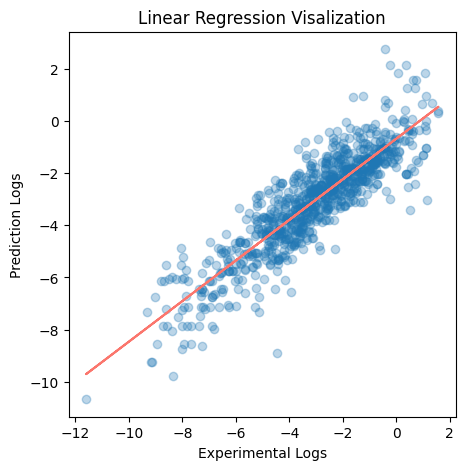

In [27]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize= (5,5))
plt.scatter(Y_train, y_lr_train_pred, alpha = 0.3)

x = np.polyfit(Y_train,y_lr_train_pred,1)
p = np.poly1d(x)
plt.plot(Y_train,p(Y_train),"#FB766D")

plt.plot()
plt.ylabel("Prediction Logs")
plt.xlabel("Experimental Logs")
plt.title("Linear Regression Visalization")

## Random Forrest

#### Training Model

In [17]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth = 2, random_state = 100)
rf.fit(X_train,Y_train)

RandomForestRegressor(max_depth=2, random_state=100)

#### Applying Model Prediction

In [18]:
y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)

#### Applying Model Performance


In [19]:
from sklearn.metrics import mean_squared_error,r2_score
# Calculate metrics
rf_train_mean = mean_squared_error(Y_train, y_rf_train_pred)
rf_train_r2 = r2_score(Y_train, y_rf_train_pred)
rf_test_mean = mean_squared_error(Y_test, y_rf_test_pred)
rf_test_r2 = r2_score(Y_test, y_rf_test_pred)

# Create a DataFrame to display the metrics
metrics_df = pd.DataFrame({
    'Mean Squared Error': [rf_train_mean, rf_test_mean],
    'R2 Score': [rf_train_r2, rf_test_r2]
}, index=['Training Data', 'Testing Data'])

# Display the DataFrame
print(metrics_df)

               Mean Squared Error  R2 Score
Training Data            1.075906  0.766365
Testing Data             1.001075  0.716559


### Model Comparison

### DataVisualization


Text(0.5, 1.0, 'Random Forrest Visualization')

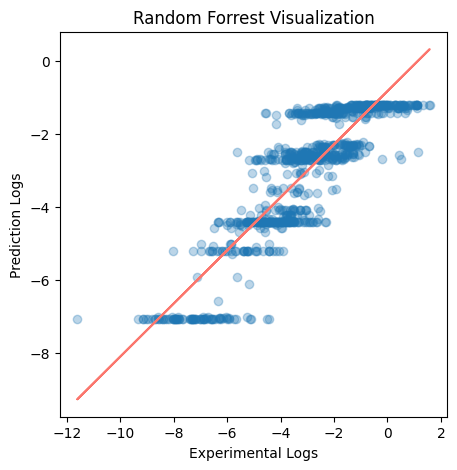

In [28]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize= (5,5))
plt.scatter(Y_train, y_rf_train_pred, alpha = 0.3)

x = np.polyfit(Y_train,y_rf_train_pred,1)
p = np.poly1d(x)
plt.plot(Y_train,p(Y_train),"#FB766D")

plt.plot()
plt.ylabel("Prediction Logs")
plt.xlabel("Experimental Logs")
plt.title("Random Forrest Visualization")

## Model Comparison


In [29]:
# Metrics for Linear Regression
lr_train_mean = mean_squared_error(Y_train, y_lr_train_pred)
lr_train_r2 = r2_score(Y_train, y_lr_train_pred)
lr_test_mean = mean_squared_error(Y_test, y_lr_test_pred)
lr_test_r2 = r2_score(Y_test, y_lr_test_pred)

# Metrics for Random Forest
rf_train_mean = mean_squared_error(Y_train, y_rf_train_pred)
rf_train_r2 = r2_score(Y_train, y_rf_train_pred)
rf_test_mean = mean_squared_error(Y_test, y_rf_test_pred)
rf_test_r2 = r2_score(Y_test, y_rf_test_pred)

# Create DataFrame for Linear Regression metrics
lr_metrics_df = pd.DataFrame({
    'Method': 'Linear Regression',
    'Mean Squared Error': [lr_train_mean, lr_test_mean],
    'R2 Score': [lr_train_r2, lr_test_r2]
}, index=['Training Data', 'Testing Data']).reset_index()

# Create DataFrame for Random Forest metrics
rf_metrics_df = pd.DataFrame({
    'Method': 'Random Forest',
    'Mean Squared Error': [rf_train_mean, rf_test_mean],
    'R2 Score': [rf_train_r2, rf_test_r2]
}, index=['Training Data', 'Testing Data']).reset_index()

# Combine the DataFrames
combined_metrics_df = pd.concat([lr_metrics_df, rf_metrics_df])

# Adjust the DataFrame to have 'Method' and 'index' (Training Data, Testing Data) as columns
combined_metrics_df.rename(columns={'index': 'Data Type'}, inplace=True)

combined_metrics_df.set_index("Method",inplace = True)
# Display the combined DataFrame
print(combined_metrics_df)

                       Data Type  Mean Squared Error  R2 Score
Method                                                        
Linear Regression  Training Data            1.021300  0.778222
Linear Regression   Testing Data            0.968745  0.725713
Random Forest      Training Data            1.075906  0.766365
Random Forest       Testing Data            1.001075  0.716559


## Sources
- https://www.youtube.com/watch?v=29ZQ3TDGgRQ&t=174s **Video guide on this project**
